## **import the data**

In [4]:
from google.colab import drive

In [5]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#loda data
airlines = pd.read_csv('/content/drive/MyDrive/airlinesdata.csv')
#the structure of the row dataset
airlines.head()

,number,Sex,Age,Rating date,Traveled date,Seat comfort,Customer service,Cleanliness,Food and Beverage,Legroom,In-flight entertainment,Value for money,Check-in and Boarding,Area,Cabin,Route
0,1,M,35-49,24/8/2018,18-Aug,3,4,4,2,1,3,4,4,International,Economy,Miami - Quito
1,2,M,50-64,24/8/2018,18-May,3,4,4,3,3,3,4,5,Domestic,Economy,Colorado Springs - Fort Myers
2,3,F,35-49,24/8/2018,18-Aug,4,4,4,4,4,5,4,4,Mexico,Economy,Dallas - Cancun
3,4,M,35-49,24/8/2018,NaN,3,1,3,2,3,3,3,1,Mexico,First Class,Seattle - Cancun
4,5,F,50-64,24/8/2018,18-Aug,2,3,3,3,3,3,2,3,Domestic,Economy,Baltimore - Sarasota


## **the structure of the data**

In [6]:
#the data types involved
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   number                   1871 non-null   int64 
 1   Sex                      1871 non-null   object
 2   Age                      1871 non-null   object
 3   Rating date              1871 non-null   object
 4   Traveled date            1681 non-null   object
 5   Seat comfort             1871 non-null   int64 
 6   Customer service         1871 non-null   int64 
 7   Cleanliness              1871 non-null   int64 
 8   Food and Beverage        1871 non-null   int64 
 9   Legroom                  1871 non-null   int64 
 10  In-flight entertainment  1871 non-null   int64 
 11  Value for money          1871 non-null   int64 
 12  Check-in and Boarding    1871 non-null   int64 
 13  Area                     1871 non-null   object
 14  Cabin                    1871 non-null  

## **data cleaning**

In [7]:
#check are there any null value in the dataframe
pd.isnull(airlines).sum()

number                       0
Sex                          0
Age                          0
Rating date                  0
Traveled date              190
Seat comfort                 0
Customer service             0
Cleanliness                  0
Food and Beverage            0
Legroom                      0
In-flight entertainment      0
Value for money              0
Check-in and Boarding        0
Area                         0
Cabin                        0
Route                        0
dtype: int64

In [8]:
#because we don't need the value of date to do some analyze, so we just select the useful data
airlines_2 = airlines.drop(['Rating date','Traveled date'],axis = 1)

In [9]:
airlines_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   number                   1871 non-null   int64 
 1   Sex                      1871 non-null   object
 2   Age                      1871 non-null   object
 3   Seat comfort             1871 non-null   int64 
 4   Customer service         1871 non-null   int64 
 5   Cleanliness              1871 non-null   int64 
 6   Food and Beverage        1871 non-null   int64 
 7   Legroom                  1871 non-null   int64 
 8   In-flight entertainment  1871 non-null   int64 
 9   Value for money          1871 non-null   int64 
 10  Check-in and Boarding    1871 non-null   int64 
 11  Area                     1871 non-null   object
 12  Cabin                    1871 non-null   object
 13  Route                    1871 non-null   object
dtypes: int64(9), object(5)
memory usage: 204

## **Quantitative research**

In [10]:
#check the frequency of male and female
airlines_2.Sex.value_counts()

M    1237
F     634
Name: Sex, dtype: int64

In [11]:
#check the frequency of different ages
airlines_2.Age.value_counts()

50-64    911
65+      426
35-49    415
25-34    105
18-24     12
13-17      2
Name: Age, dtype: int64

In [12]:
#check the frequency of airline area
airlines_2.Area.value_counts()

Domestic         1064
International     533
Caribbean         121
Mexico             78
USA                56
Canada             19
Name: Area, dtype: int64

In [13]:
#check the frequency of cabin
airlines_2.Cabin.value_counts()

Economy           1428
First Class        237
Business Class     206
Name: Cabin, dtype: int64

In [14]:
#numerical variables
airlines_2.describe()

,number,Seat comfort,Customer service,Cleanliness,Food and Beverage,Legroom,In-flight entertainment,Value for money,Check-in and Boarding
count,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000
mean,936.000000,3.395510,3.619455,3.795831,3.138429,3.424372,3.197755,3.291823,3.682523
std,540.255495,1.098205,1.306719,1.013283,1.157895,1.137839,1.324155,1.169731,1.254600
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,468.500000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000
50%,936.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000
75%,1403.500000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,1871.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [15]:
#calculate the average rating of each person
average = airlines_2.iloc[0:,[3,4,5,6,7,8,9,10]].mean(axis = 1)

In [16]:
#insert the value of average to dataframe
airlines_2.insert(11,'average',average)
airlines_2.head()

,number,Sex,Age,Seat comfort,Customer service,Cleanliness,Food and Beverage,Legroom,In-flight entertainment,Value for money,Check-in and Boarding,average,Area,Cabin,Route
0,1,M,35-49,3,4,4,2,1,3,4,4,3.125,International,Economy,Miami - Quito
1,2,M,50-64,3,4,4,3,3,3,4,5,3.625,Domestic,Economy,Colorado Springs - Fort Myers
2,3,F,35-49,4,4,4,4,4,5,4,4,4.125,Mexico,Economy,Dallas - Cancun
3,4,M,35-49,3,1,3,2,3,3,3,1,2.375,Mexico,First Class,Seattle - Cancun
4,5,F,50-64,2,3,3,3,3,3,2,3,2.750,Domestic,Economy,Baltimore - Sarasota


## **the differences between male and female**

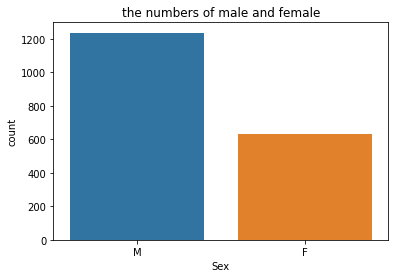

In [46]:
sns.countplot(x='Sex',data=airlines_2)
plt.title('the numbers of male and female')
plt.show()

In [26]:
result1 = (airlines_2.groupby(['Sex']).mean().T).iloc[1:,]
male_value = result1.iloc[0:,1]
result2=result1.drop(['M'],axis=1)
result2.insert(0,'M',male_value)
result2

Sex,M,F
Seat comfort,3.442199,3.304416
Customer service,3.687146,3.487382
Cleanliness,3.875505,3.640379
Food and Beverage,3.141471,3.132492
Legroom,3.479386,3.317035
In-flight entertainment,3.250606,3.094637
Value for money,3.357316,3.164038
Check-in and Boarding,3.738076,3.574132
average,3.496463,3.339314


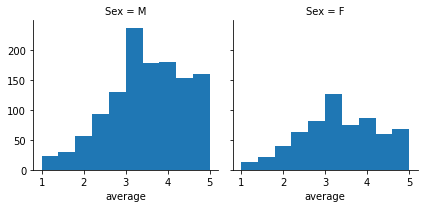

In [58]:
g = sns.FacetGrid(airlines_2, col='Sex')
g = g.map(plt.hist, 'average')

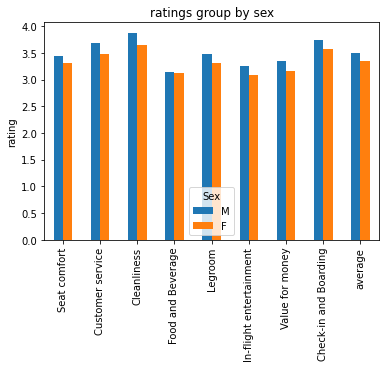

In [42]:
result2.plot(kind = 'bar',title = 'ratings group by sex',ylabel = 'rating')
plt.show()

## **the differences between different cabins**

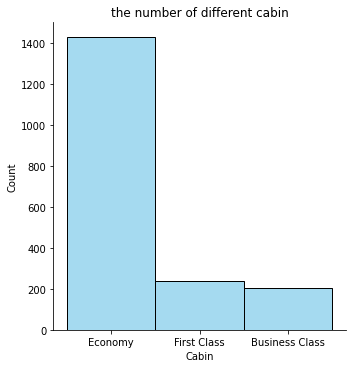

In [47]:
sns.displot(airlines_2['Cabin'], color="skyblue", bins=20)
plt.title('the number of different cabin')
plt.show()

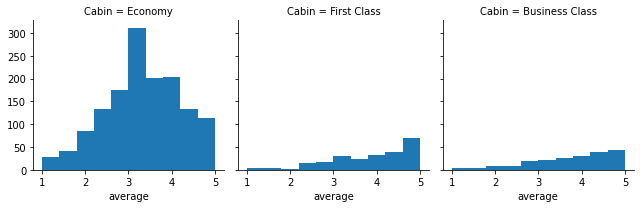

In [63]:
g1 = sns.FacetGrid(airlines_2, col='Cabin')
g1 = g1.map(plt.hist, 'average')


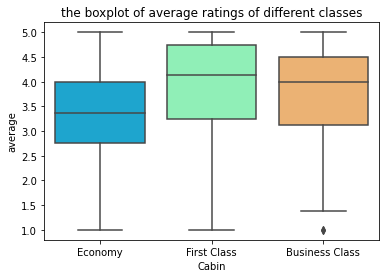

In [64]:
sns.boxplot(x="Cabin", y="average", data=airlines_2, palette='rainbow')
plt.title('the boxplot of average ratings of different classes')
plt.show()